# Landau-Zener formula

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

\begin{equation}
H(t) = \begin{pmatrix} vt & \Delta \\ \Delta & -vt \end{pmatrix}
\end{equation}

\begin{equation}
E(t) = \pm \sqrt{\Delta^2+v^2t^2}
\end{equation}

In [2]:
v,Delta = 1,0.6

def H(t):
    return np.array([[v*t,Delta],[Delta,-v*t]])

time = np.arange(-20,20,0.1)

band = np.array([np.linalg.eigvalsh(H(t)) for t in time])

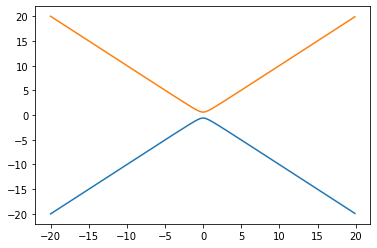

In [3]:
plt.plot(time,band[:,0])
plt.plot(time,band[:,1])

## Numerical solution of the Schrodinger's equation

\begin{gather}
\partial_t\psi(t) = -iH(t)\psi(t) \\
\psi(0) = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
\end{gather}

In [4]:
def psi_dot(t,psi):
    return -1j*np.matmul(H(t),psi)

psi_0 = np.array([1,0],dtype=complex)

psi = solve_ivp(fun=psi_dot,t_span=(-20,20),y0=psi_0,t_eval=time)

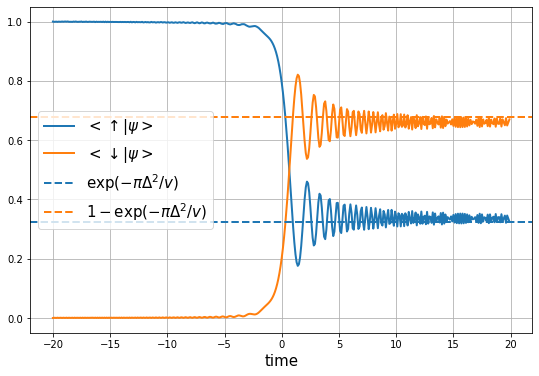

In [5]:
plt.figure(figsize=(9,6))
plt.xlabel('time',fontsize=15)
plt.plot(psi.t,np.abs(psi.y[0])**2,lw=2,label=r'$<\uparrow|\psi>$')
plt.plot(psi.t,np.abs(psi.y[1])**2,lw=2,label=r'$<\downarrow|\psi>$')
#plt.plot(psi.t,np.abs(psi.y[0])**2+np.abs(psi.y[1])**2)
plt.grid()
c0 = np.exp(-np.pi*Delta**2/v)
c1 = 1-c0
plt.axhline(c0,c='C0',lw=2,ls='--',label=r'$\mathrm{exp}(-\pi\Delta^2/v)$')
plt.axhline(c1,c='C1',lw=2,ls='--',label=r'$1-\mathrm{exp}(-\pi\Delta^2/v)$')
plt.legend(fontsize=15);